<a href="https://colab.research.google.com/github/LF7-AI/Coding-for-Computational-Biologist/blob/main/Rough_Work_for_MSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step-1: install required tools
!pip install biopython
!apt-get install -y clustalo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 8.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libargtable2-0
The following NEW packages will be installed:
  clustalo libargtable2-0
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 273 kB of archives.
After this operation, 694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libargtable2-0 amd64 13-1.1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalo amd64 1.2.4-7 [259 kB]
Fetched 273 kB in 2s (151 kB/s)
Selecting previously unselected package libargtable2-0.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../libargtable2-0_13-1.1_amd64.deb ...
Unpacking libargtable2-0 (13-1.1) ...
Selecting previously unselected package clustalo.
Preparing to unpack ..

In [ ]:
#Step-2: Import Modules
from Bio import SeqIO
from Bio import AlignIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from collections import Counter
import subprocess

In [ ]:
# Step-3- PART/1: Read Exisitng FASTA FILE-1
from google.colab import files
uploaded = files.upload()                # Fix: Added missing closing parenthesis
fasta_file_mod = list(uploaded.keys())[0]
sequences = list(SeqIO.parse(fasta_file_mod, "fasta"))
print("Uploaded Sequences:")
for record in sequences:
    print(f"{record.id}: {record.seq}")

Saving gene.fna to gene.fna
Uploaded Sequences:
NW_021636346.1:c40256-27400: TCACGGAGCTTAAACAAGGCCCTCTATAGCCTCTGTCTGCTTACTGTGCCACAAAAACGCCCACCTTCATAACGGCTTCTTGCATAAGCGACTGTGGAAGAAAGCTGGGGAGAGTGGTGGAGTTGATTGCCATGGGGTTTTCGACCCAGAAGCCCACCACCACCACTTTGCGGCCCTTTTGCCCCTCCTCTTTCTGGACTTCGCGCTCTTGTCGTTCCTTTCGCGTCGCTTCTTCTTCTTGGCCTCTCATGGCTCCCTCCGAAGCTCACTATGGCAGGTTCACTTCTGCTGTTCTTTTTTTACGTTCTCTGCAAGTTTTTACCTCTTGGCGCATGGGTTACTGTTTTTCACTGCAGATTTTTGAAATTTAATTCAATATCCTTACGTTTTAGGGAGGGCATAAGTGTTTTCAGGGAAACATGGCCTTGTCATGGTAAATGTAATGGTCAATTTTTTTTTTTTGGTGAATTCACTCTATCTATTTATAAGTGCAGTTGTCATTGTTTTGTTGGTAATGCACTTTTCCTAGATGTTTCCCAAAAAAGGTAGTTGGTAGCACATTGTCGGAGCTGAACGTTGACGTTTTGTTTTTCGGTGCACATTTTCGAAATTCGTTAGATAATCCAAAGTTTTAGACGAATGTTTTGGCGAAAGCCCATACTAACCAAATGGTCAGTTCGTTTGGCCTATTTGTTTATATTATTCAATGACCTCTTTGTGCATTCAAAATTTTTGTAACGCATTTGTTGTTGTTTGTGGGGGTGGGGAGGGGGCTTTGAATTTTGAGAAGTTAGTGTAGTAGCATATGTAATAAGTCAATGGTGTCATCTCGAGGACTTTTTCTGGCTAGCTTAAAATCTTGTTTGGCCTAAGGTGATTATAAACGTCTTGCTTCTTCTTCTGTGGGTTAAATTGATATTTAA

In [ ]:
# Step-3- PART/2: Read Exisitng FASTA FILE-2 #Here collab added the fasta file 1 & 2 and made them to combined sequences.
# Remember fasta file 1 = gene.fna & fasta file 2 = tp53.fna
# Clustal requires minimum 2 sequences to run or else it will run into error

from google.colab import files
uploaded = files.upload()
fasta_file_human = list(uploaded.keys())[0]
sequences_human = list(SeqIO.parse(fasta_file_human, "fasta"))
print("Uploaded Sequences:")
for record in sequences_human:
    print(f"{record.id}: {record.seq}")

# Combine sequences from both files
all_sequences = sequences + sequences_human

# Save combined sequences to a new FASTA file
combined_fasta_file = "combined_sequences.fasta"
SeqIO.write(all_sequences, combined_fasta_file, "fasta")

Saving Tp53.fna to Tp53 (1).fna
Uploaded Sequences:
NC_000077.7:69471174-69482699: GGGATTGGGACTTTCCCCTCCCACGTGCTCACCCTGGCTAAAGTTCTGTAGCTTCAGTTCATTGGGACCATCCTGGCTGTAGGTAGCGACTACAGTTAGGGGGCACCTAGCATTCAGGCCCTCATCCTCCTCCTTCCCAGCAGGGTGTCACGCTTCTCCGAAGACTGGGTAAGTAATTGATGAGCGTGACGAGACCTCTCGGTCACTGGCTCTCTCCGTTTGCATCCATAAAACTAGAGAAAACCGTGGGGTTTGGGGGTGGGGCAGTGGGGGGACTCAGCGCGATGGAGATGGGCGGAATGGAAGCTTGGCGGGCGGGATGAACGGGAGTGTATATGTCAGATGCTGTAGTGAGGGTAGCTGATGATGATGATGTTAGGACCGACGAGCCTCACTGTCATGCACCTGCAAAGTAGAGCATATAGGGACCACTGAGATGGCCTAAGGGGTTTTCTCTCCGCTACGCGTTGTACACACTTATCTGCCCGCTGCTAGGTGATGGAAGCTCCGGAAATAACATGCACAAAGCACCAGGATTTAAGATTTTTCGAGATTCATAGCTTAAGACTTAAGACCCCCCATAGCATCCTAATGAAACCCTGGGTTCCGTTCCTGGATGAGATCGGGGTGATCCGGGGAGCCTTAGCTGCTAAGGTCCCGCAACTTCCGGACCTTTGTCCCTGGAGTGATTTCTTTTTTTTTCCAGCCGCTTCTCGACCCTGCTAGATGAAGAAAATCCAAGAAAAGCCTGAAGCACTAGCGGTGCTAGCCAGAAGTATTTGCCCTCGGGGCCCGACTCAGCCTCTTGGTCTGAAAGGCCCGCCGGCCCTGTTATTGTTTGGCTCCTTTACGTTTCTGCCGCTTGCAGGAGCATTTCCGGTTTCTTGTTTTCGGAGCAGATCACTGCTCGCCCGGCG

2

In [ ]:
# Step 4: Run Clustal Omega alignment
aligned_file = "aligned_sequences.fasta"
command = f"clustalo -i \"{combined_fasta_file}\" -o {aligned_file} --force --outfmt=fasta"
process = subprocess.run(command, shell=True, capture_output=True, text=True)
print(process.stderr)                         #stderr = standard error, to check the error occuring which the python will remember in its pipe line.

In [ ]:
#Step 5: Read and display the aligned sequence
from Bio import AlignIO
aligned_file = "aligned_sequences.fasta"
alignment = AlignIO.read(aligned_file, "fasta")
print("Aligned Sequences:")
for record in alignment:
    print(f"{record.id}: {record.seq}")

Aligned Sequences:
NC_000077.7:69471174-69482699: GGGATTGGGACTTTCCCCTCCCACGTGCTCACCCTGGCTAAAGTTCTGTAGCTTCAGTTCATTGGGACCATCCTGGCTGTAGGTAGCGACTACAGTTAGGGGGCACCTAGCATTCAGGCCCTCATCCTCCTCCTTCCCAGCAGGGTGTCACGCTTCTCCGAAGACTGGGTAAGTAATTGATGAGCGTGACGAGACCTCTCGGTCACTGGCTCTCTCCGTTTGCATCCATAAAACTAGAGAAAACCGTGGGGTTTGGGGGTGGGGCAGTGGGGGGACTCAGCGCGATGGAGATGGGCGGAATGGAAGCTTGGCGGGCGGGATGAACGGGAGTGTATATGTCAGATGCTGTAGTGAGGGTAGCTGATGATGATGATGTTAGGACCGACGAGCCTCACTGTCATGCACCTGCAAAGTAGAGCATATAGGGACCACTGAGATGGCCTAAGGGGTTTTCTCTCCGCTACGCGTTGTACACACTTATCTGCCCGCTGCTAGGTGATGGAAGCTCCGGAAATAACATGCACAAAGCACCAGGATTTAAGATTTTTCGAGATTCATAGCTTAAGACTTAAGACCCCCCATAGCATCCTAATGAAACCCTGGGTTCCGTTCCTGGATGAGATCGGGGTGATCCGGGGAGCCTTAGCTGCTAAGGTCCCGCAACTTCCGGACCTTTGTCCCTGGAGTGATTTCTTTTTTTTTCCAGCCGCTTCTCGACCCTGCTAGATGAAGAAAATCCAAGAAAAGCCTGAAGCACTAGCGGTGCTAGCCAGAAGTATTTGCCCTCGGGGCCCGACTCAGCCTCTTGGTCTGAAAGGCCCGCCGGCCCTGTTATTGTTTGGCTCCTTTACGTTTCTGCCGCTTGCAGGAGCATTTCCGGTTTCTTGTTTTCGGAGCAGATCACTGCTCGCCCGGCGACGGGGGAGTAGCGAAAGGGGAGAAATGGATTC

In [ ]:
# Step 6: Calculate percentage identity
# Assuming there are only two sequences in the alignment
seq1 = alignment[0].seq
seq2 = alignment[1].seq

# Ensure sequences are of the same length (should be after alignment)
if len(seq1) != len(seq2):
    print("Error: Aligned sequences have different lengths.")
else:
    total_length = len(seq1)
    identical_residues = sum(1 for a, b in zip(seq1, seq2) if a == b and a != '-') # Exclude gaps
    percentage_identity = (identical_residues / total_length) * 100
    print(f"Percentage Identity: {percentage_identity:.2f}%")

Percentage Identity: 99.85%


In [ ]:
# Step 7: Save aligned sequences in CLUSTAL format
AlignIO.write(alignment, "aligned_output.aln", "clustal")

1

In [ ]:
# Step 8: Identify conserved positions

print("\nconserved postions:")
for i in range(len(alignment[0])):
  column = [record.seq[i] for record in alignment]
  counts = Counter(column)
  if len(counts) == 1:
    print(f"Position {i+1}: {column[0]} (conserved)")


conserved postions:
Position 1: C (conserved)
Position 2: T (conserved)
Position 3: C (conserved)
Position 4: A (conserved)
Position 5: A (conserved)
Position 6: A (conserved)
Position 7: A (conserved)
Position 8: G (conserved)
Position 9: T (conserved)
Position 10: C (conserved)
Position 11: T (conserved)
Position 12: A (conserved)
Position 13: G (conserved)
Position 14: A (conserved)
Position 15: G (conserved)
Position 16: C (conserved)
Position 17: C (conserved)
Position 18: A (conserved)
Position 19: C (conserved)
Position 20: C (conserved)
Position 21: G (conserved)
Position 22: T (conserved)
Position 23: C (conserved)
Position 24: C (conserved)
Position 25: A (conserved)
Position 26: G (conserved)
Position 27: G (conserved)
Position 28: G (conserved)
Position 29: A (conserved)
Position 30: G (conserved)
Position 31: C (conserved)
Position 32: A (conserved)
Position 33: G (conserved)
Position 34: G (conserved)
Position 35: T (conserved)
Position 36: A (conserved)
Position 37: G (

In [ ]:
# Step 8: Heatmap of conservation across alignment
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Build a matrix of character frequencies per column
alignment_array = np.array([list(rec.seq) for rec in alignment])
nun_seqs, seq_len = alignment_array.shape

In [ ]:
# Count most common characters per column
conservation_scores = []
for i in range(seq_len):
  counts = Counter(alignment_array[:, i])
  most_common = counts.most_common(1)[0][1]
  score = most_common / nun_seqs
  conservation_scores.append(score)

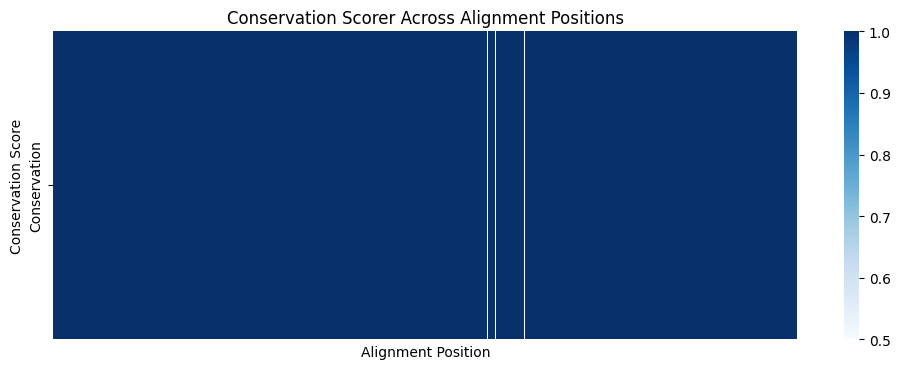

In [ ]:
# Plot Conservation
plt.figure(figsize=(12 ,4))
sns.heatmap([conservation_scores], cmap= "Blues", cbar= True, xticklabels=False, yticklabels= ["Conservation"])
plt.title("Conservation Scorer Across Alignment Positions")
plt.xlabel("Alignment Position")
plt.ylabel("Conservation Score")
plt.show()


In [ ]:
# Step 9: Generate and visualize phylogenetic tree
from Bio import Phylo
import subprocess

#Use the alignment saved in CLUSTAL format
# 1st run clustal again -

aligned_file = "aligned_sequences.fasta"
command = f"clustalo -i \"{fasta_file_human}\" -o {aligned_file} --force"
subprocess.run(command, shell=True, check=True)

# 2nd run the aligned seq again
aligned_file = "aligned_sequences.fasta"
alignment = AlignIO.read(aligned_file, "fasta")

aligned_file ="aligned_output.aln"
dnd_file = "alignment.dnd"
fasta_file_human = "Human Tp53.fna"

# Generate tree using Clustal Omega again (outputs .dnd file)
tree_cmd = f"clustalo -i \"{fasta_file_human}\" -o {aligned_file} --guidetree-out={dnd_file} --force --outfmt=clustal" # Corrected aln_file to aligned_file
subprocess.run(tree_cmd, shell=True, check=True)

# tree building
tree = Phylo.read(dnd_file, "newick")
Phylo.draw_ascii(tree)    ####################################
#############################THE FILE MUST CONTAIN MINIMUM 3 SEQUENCE TO READ AS TREE#####################

FileNotFoundError: [Errno 2] No such file or directory: 'alignment.dnd'

In [ ]:
# Step 10 : Print alignment with '*' for conserved postions
print("\nAlignment wiht conserved postions markedd by '*':\n")
for record in alignment:
  print(f"record.id: <10: {record.seq}")

# Identify conserved psotions
cons_line - ""
for i in range(len(alignment[0])):
  column = [record.seq[i] for record in alignment]
  if all(base ==column[0] for base in column):
    cons_line += "*"
  else:
    cons_line += "-"
print("" * 11 + cons_line)


Alignment wiht conserved postions markedd by '*':

record.id: <10: CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGCTGGGAGCGTGCTTTCCACGACGGTGACACGCTTCCCTGGATTGGGTAAGCTCCTGACTGAACTTGATGAGTCCTCTCTGAGTCACGGGCTCTCGGCTCCGTGTATTTTCAGCTCGGGAAAATCGCTGGGGCTGGGGGTGGGGCAGTGGGGACTTAGCGAGTTTGGGGGTGAGTGGGATGGAAGCTTGGCTAGAGGGATCATCATAGGAGTTGCATTGTTGGGAGACCTGGGTGTAGATGATGGGGATGTTAGGACCATCCGAACTCAAAGTTGAACGCCTAGGCAGAGGAGTGGAGCTTTGGGGAACCTTGAGCCGGCCTAAAGCGTACTTCTTTGCACATCCACCCGGTGCTGGGCGTAGGGAATCCCTGAAATAAAAGATGCACAAAGCATTGAGGTCTGAGACTTTTGGATCTCGAAACATTGAGAACTCATAGCTGTATATTTTAGAGCCCATGGCATCCTAGTGAAAACTGGGGCTCCATTCCGAAATGATCATTTGGGGGTGATCCGGGGAGCCCAAGCTGCTAAGGTCCCACAACTTCCGGACCTTTGTCCTTCCTGGAGCGATCTTTCCAGGCAGCCCCCGGCTCCGCTAGATGGAGAAAATCCAATTGAAGGCTGTCAGTCGTGGAAGTGAGAAGTGCTAAACCAGGGGTTTGCCCGCCAGGCCGAGGAGGACCGTCGCAATCTGAGAGGCCCGGCAGCCCTGTTATTGTTTGGCTCCACATTTACATTTCTGCCTCTTGCAGCAGCATTTCCGGTTTCTTTTTGCCGGAGCAGCTCACTATTCACCCGATGAGAGGGGAGGAGAGAGAGAGAAAATGTCCTTTAGGCCGGTTCCTCTTACTTGGCAGAGGGA